# Assignment Answers

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Defining datasets path
wine_data = 'Datasets/winequality-red.csv'
student_data = 'Datasets/StudentsPerformance.csv'

# 1.

The key features of wine quality datasets with their importance are listed below:<br><br>
1. fixed acidity
- Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- The wine's acidity is what makes it tasting young and vibrant. 
- It enhances a wine's overall balance and lends wines a tart, tangy flavour. 
- It also influences how well a wine will age and makes it a contender for excellent food pairings.
2. volatile acidity
- Volatile acidity is the gaseous acids present in wine.
3. residual sugar
- Amount of sugar left after fermentation.
4. chlorides
- Amount of salt present in wine.
5. free sulfur dioxide
- So2 is used for prevention of wine by oxidation and microbial spoilage.
6. pH
-  In wine pH is used for checking acidity
7. sulphates
- Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
8. alcohol
- Percent of alcohol present in wine.

# 2.

In [ ]:
# Loading Dataset 
df = pd.read_csv(wine_data,delimiter=';')

# Checking missing data for each feature
df.isnull().sum()

After analyzing the adove dataset, we find that there was not any missing data in any of the features present
<br><br>
Advantages and disadvantages of imputation techniques are given below.<br><br>
1. Mean/Median Imputation<br><br>
Advantages<br><br>
- Simplicity and ease of implementation are some of the benefits of the mean and median imputation.
- The imputation is performed using the existing information from the non-missing data; hence no additional data is required.
- Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.
<br><br>
Disadvantages<br><br>
- We cannot apply these two strategies to categorical columns. They can only work for numerical ones.
- Mean imputation is sensitive to outliers and may not be a good representation of the central tendency of the data. Similarly to the mean, the median also may not better represent the central tendency.
- Median imputation makes the assumption that the data is missing completely at random (MCAR), which is not always true. 
<br><br>
2. Random Sample Imputation<br><br>
Advantages<br><br>
- This is an easy and straightforward technique.
- It tackles both numerical and categorical data types.
- There is less distortion in data variance, and it also preserves the original distribution of the data, which is not the case for mean, median, and more.
<br><br>
Disadvantages<br><br>
- The randomness does not necessarily work for every situation, and this can infuse noise in the data, hence leading to incorrect statistical conclusions. 
- Similarly to the mean and median, this approach also assumes that the data is missing completely at random (MCAR).
<br><br>
3. Multiple Imputation<br><br>
Advantages<br><br>
- Multiple imputation is powerful at dealing with missing data in multiple variables and multiple data types. 
- The approach can produce much better results than mean and median imputations. 
- Many other algorithms, such as K-Nearest Neighbors, Random forest, and neural networks, can be used as the backbone of the multiple imputation prediction for making predictions. 
<br><br>
Disadvantages<br><br>
- Multiple imputation assumes that the data is missing at random (MAR).
- Despite all the benefits, this approach can be computationally expensive compared to other techniques, especially when working with large datasets. 
- This approach requires more effort than the previous ones.

# 3.

The key factors that affect the student's performance in an exam can be:<br><br>
1. Family background: What educational qualification they have?
2. Difficulty in understanding: If it takes time to understand things or not?
3. Unhealthy lifestyle: It is related to food, sleep, meditation, etc.
4. Proper Study: Whether the student has studied everything or not?

The statistical techniques that we can use to analyze these factors are discussed below:<br><br>
1. Finding correlation between the variables: We can find relation between each category with the exam results in order to know whether they have any positive or negative effect on their results.
2. Using diagrams: There are different diagrams available to know about the distribution and relationships between different features, like heatmap, using which we can analyze what all features are affecting student's performance.

# 4.

In [ ]:
# Loading Dataset
df = pd.read_csv(student_data)

Let's check for the types of each feature .

In [ ]:
df.dtypes

From the above output we can observe that there are many features which are categorical in nature.<br><br>
1. First, we will perform data encoding

In [ ]:
df_new = pd.get_dummies(data=df,columns= ["gender","race/ethnicity","parental level of education","lunch","test preparation course"])


2. Now, we will create another column showing the percentage of total marks

In [ ]:
df_new["percentage"] = (df_new['math score']+df_new['reading score']+df_new['writing score'])/3

3. As we have to test overall performance of the student, that's why we can rely on percentage feature for it and can drop the rest

In [ ]:
df_new.drop(['math score','reading score','writing score'],axis=1,inplace=True)

4. Finaaly, we can go for feature selection using different algorithms

# 5.

In [ ]:
# Loading Datset
df = pd.read_csv(wine_data,delimiter=';')

# Showing Data
df.head()

In [ ]:
# Showing distribution of each feature
plt.figure(figsize=(12,6))
plt.suptitle("Distribution Plot For Various Features")

for i in range(len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True,color="r")
    plt.xlabel(df.columns[i])
    plt.tight_layout()
                

Features that exhibit non-normality are:<br><br>
- free sulfur dioxide
- alcohol
- total sulphur dioxide
- residual sugar
- sulphates

Most of the features showing non-normality are right-skewed. And the distribution of data to the right of the mean is also less, which means there might be outliers present.<br>
So, we can remoe the ouliers present from the features which may help us to get the normal distribution of these features.

# 6.

In [71]:
# Importing Library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as sc

In [55]:
# Loading dataset
df = pd.read_csv(wine_data,delimiter=';')

In [81]:
# Normalizing Data
scaler = sc()
scaler.fit(df)
data_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data_scaled,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])


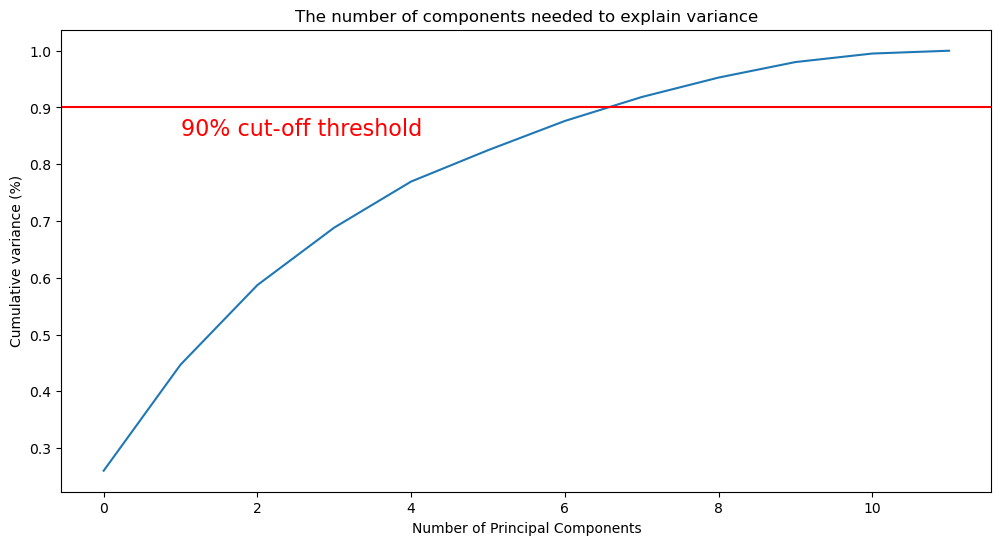

In [83]:
# Setting figure size
plt.figure(figsize=(12,6))

pca = PCA().fit(df_scaled)

# Plotting Data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.90, color='r', linestyle='-')


plt.title('The number of components needed to explain variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative variance (%)')
plt.text(1, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

# Showing Data
plt.show()

As per the question of, how many principal components to be retain, then we should follow the following statement;<br><br>
- Ideally, we can choose the number of principal components as there are features in our dataset, but it will not help us to achieve the goal of PCA.
- So, the optimal number of principal components is reached when the cumulative variance stops growing fast or we have obtained variance of greater than or equal to 90%.
<br><br>
Hence,<br>
after observing the above plot (No. of PCs VS Cumulative Variances), we can cleary say that it will be better to go with eight principal components for the dataset that we have currently. 